In [ ]:
%env TF_ENABLE_ONEDNN_OPTS=0
import tensorflow as tf

env: TF_ENABLE_ONEDNN_OPTS=0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import regularizers

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/drive/MyDrive/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/drive/MyDrive/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2931 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Load the MobileNetV2 model pre-trained on ImageNet data
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your classification task
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(5, activation='softmax')(x)  # Set num_classes to the number of classes in your dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model


9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
history=model.fit(train_data,steps_per_epoch=60, epochs=20, validation_data=valid_data, callbacks=[early_stopping])

Epoch 1/20
60/60 [==============================] - 636s 10s/step - loss: 0.9161 - accuracy: 0.6686 - val_loss: 0.8138 - val_accuracy: 0.6826
Epoch 2/20
60/60 [==============================] - 267s 4s/step - loss: 0.7650 - accuracy: 0.7179 - val_loss: 0.7689 - val_accuracy: 0.7073
Epoch 3/20
60/60 [==============================] - 208s 3s/step - loss: 0.7409 - accuracy: 0.7310 - val_loss: 0.6799 - val_accuracy: 0.7456
Epoch 4/20
60/60 [==============================] - 165s 3s/step - loss: 0.7131 - accuracy: 0.7341 - val_loss: 0.6940 - val_accuracy: 0.7538
Epoch 5/20
60/60 [==============================] - 167s 3s/step - loss: 0.6562 - accuracy: 0.7577 - val_loss: 0.6980 - val_accuracy: 0.7510
Epoch 6/20
60/60 [==============================] - 208s 3s/step - loss: 0.6820 - accuracy: 0.7520 - val_loss: 0.6625 - val_accuracy: 0.7565
Epoch 7/20
60/60 [==============================] - 171s 3s/step - loss: 0.7048 - accuracy: 0.7467 - val_loss: 0.6430 - val_accuracy: 0.7647
Epoch 8/20
6

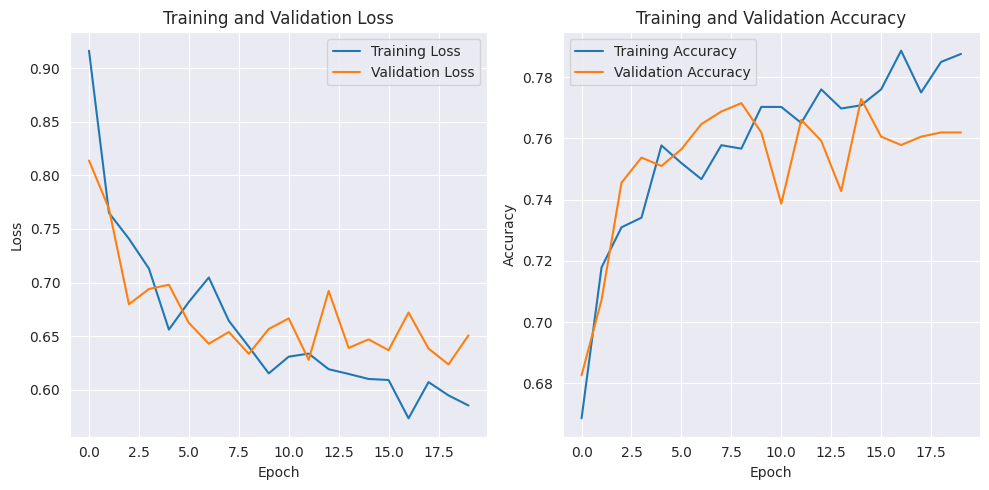

In [ ]:
plt.figure(figsize=(10, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_data = datagen.flow_from_directory('/content/drive/MyDrive/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 731 images belonging to 5 classes.


In [ ]:
evaluation_result=model.evaluate(test_data,verbose=1)
print("Test loss: ",evaluation_result[0])
print("Test Accuracy: ",evaluation_result[1])

23/23 [==============================] - 42s 2s/step - loss: 0.6390 - accuracy: 0.7715
Test loss:  0.6390310525894165
Test Accuracy:  0.7715458273887634
